<a href="https://colab.research.google.com/github/NabajeetBarman/AppliedDataProgramming/blob/main/Numpy_Advanced_(Maths_and_Stats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numpy Advanced (Basic Maths and Statistics)

#####################################################################################

Parts of this module is borrowed from the official [Numpy Manual v1.21](https://numpy.org/doc/stable/#) and Official Scipy Lecture notes.

Copyright@ *Nabajeet Barman*

#####################################################################################


In [ ]:
import numpy as np # Let us start by importing numpy

# Basic array operations

Here we will discuss

* Addition
* Subtraction
* Multiplication
* Division

In [ ]:
arr = np.array([1,2,3,4,5,])
arr

array([1, 2, 3, 4, 5])

In [ ]:
# basic operations
# adding a scalar
arr + 3

array([4, 5, 6, 7, 8])

In [ ]:
#subtracting a scalar
arr - 3

array([-2, -1,  0,  1,  2])

In [ ]:
# multiplying a scalar
arr * 3

array([ 3,  6,  9, 12, 15])

In [ ]:
#dividing by a scalar
arr / 3

array([0.33333333, 0.66666667, 1.        , 1.33333333, 1.66666667])

# NumPy Broadcasting

NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape.

In [ ]:
#like we just saw earlier
# for example
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a*b

array([2., 4., 6.])

In [ ]:
# in case of scalar multiplication
a * 2.0

array([2., 4., 6.])

This is what broadcasting is!!! 

Actually, scalar value 2.0 is in memory created into an array of same shape as `a`

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when

>* they are equal, or
>* one of them is 1

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:

![NumPy Broadcasting ](https://drive.google.com/uc?export=view&id=1FmczV-HEq5Kee5XFrlG_OhP4DJ5ObWdT)

Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction
between the two arrays:
> • Rule 1: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.

> • Rule 2: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.

> • Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.

You can read more about broadcasting [here](https://numpy.org/doc/stable/user/basics.broadcasting.html) and Section 4.2.3 [here](https://scipy-lectures.org/_downloads/ScipyLectures.pdf) from which we have also used the examples below.

## Case 1:

In [ ]:
# Let us define the matrix above
#mat_a = np.tile(np.arange(0, 40, 10), (3, 1)).T
mat_a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
print(mat_a)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]


In [ ]:
# define the other matrix
mat_b = np.array([[0,1,2],[0,1,2],[0,1,2],[0,1,2]])
print(mat_b)

[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]


In [ ]:
mat_a + mat_b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## Case 2:

In [ ]:
mat_b = np.array([0,1,2])
print(mat_b)

[0 1 2]


In [ ]:
mat_a + mat_b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## Case 3:

In [ ]:
mat_a = np.arange(0,40,10).T
mat_a.shape

(4,)

In [ ]:
mat_a = mat_a.reshape(4,1)
print(mat_a)

[[ 0]
 [10]
 [20]
 [30]]


In [ ]:
mat_a = mat_a[:, np.newaxis] # add a new axis --> 2D array
mat_a

array([[[ 0]],

       [[10]],

       [[20]],

       [[30]]])

In [ ]:
mat_b

array([0, 1, 2])

In [ ]:
mat_a + mat_b

array([[[ 0,  1,  2]],

       [[10, 11, 12]],

       [[20, 21, 22]],

       [[30, 31, 32]]])

The broadcasting rules can be summarized as:

Arrays do not need to have the same number of dimensions. For example, if you have a 256x256x3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

> ```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other. 

In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

> ```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```




Considering another example:

In [ ]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

In [ ]:
x.shape

(4,)

In [ ]:
y.shape

(5,)

In [ ]:
# commented the below as it raises error and hence will interrupt "Run All" execution
# x + y

In [ ]:
xx.shape

(4, 1)

In [ ]:
y.shape

(5,)

In [ ]:
(xx + y).shape

(4, 5)

In [ ]:
xx + y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [ ]:
x.shape

(4,)

In [ ]:
z.shape

(3, 4)

In [ ]:
(x+z).shape

(3, 4)

In [ ]:
x+z

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

# Simple maths using two arrays

In [ ]:
sample_array = np.array([1, 2])
#print(sample_array)
ones = np.ones(2, dtype=int)
#print(ones)
sample_array + ones

array([2, 3])

In [ ]:
sample_array - ones

array([0, 1])

In [ ]:
sample_array * sample_array

array([1, 4])

In [ ]:
sample_array / sample_array

array([1., 1.])

In [ ]:
sample_array * 5

array([ 5, 10])

Some other operations

In [ ]:
# calculate sine
np.sin(arr)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [ ]:
# calculate cosine
np.cos(arr)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219])

# Advanced Array Operations

* Maximum
* Minimum
* Sum
* Mean
* Product
* Standard Deviation

In [ ]:
# Lets define a sample array first
sample_array = np.array([1, 3, 5, 10, 2, 7, 4])
print(sample_array)

[ 1  3  5 10  2  7  4]


Finding the maximum of the array

In [ ]:
sample_array.max()

10

Finding the minimum of the array

In [ ]:
sample_array.min()

1

Finding the sum of the array

In [ ]:
sample_array.sum()

32

Finding the mean of the array

In [ ]:
sample_array.mean()

4.571428571428571

In [ ]:
# prod will multiply all the elements
sample_array.prod()

8400

### Operations on 2D arrays

Lets declare a sample 2D array

In [ ]:
sample_2darray = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(sample_2darray)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### Find the minimum value within the array

In [ ]:
sample_2darray.min()

1

### Find the minimum value within each row

In [ ]:
sample_2darray.min(axis=1)

array([1, 5, 9])

### Find the minimum value within each column

In [ ]:
sample_2darray.min(axis=0)

array([1, 2, 3, 4])

# File input and output with arrays


## Saving a NumPy array

In [ ]:
sample_array = np.arange(10)
np.save('filename', sample_array) # filename is the name of the array being saved
print(sample_array)

[0 1 2 3 4 5 6 7 8 9]


Loading a saved NumPy array (extension `.npy`)

In [ ]:
loaded_array = np.load('filename.npy')
print(loaded_array)

[0 1 2 3 4 5 6 7 8 9]


Saving a NumPy array as a plain text file (.csv or .txt) file with `np.savetxt`.

With `savetxt` command, one can specify headers, footers, comments, and more

In [ ]:
np.savetxt('file.csv', sample_array)

Loading the save csv file

In [ ]:
# Additional optional parameters such as header, footer, and delimiter can be mentioned

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
#np.loadtxt('file.csv', dtype=[('n',int)])

Note: `.npz` and `.npy` are smaller and faster to read while `.csv` and `.txt` files are easier to share and are human-readable.

## Pseudorandom Number Generation

From Wiki: A pseudorandom number generator (PRNG), also known as a deterministic random bit generator (DRBG), is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers.

In [ ]:
pseudo_randNum = np.random.normal(size=(4, 4))
print(pseudo_randNum)

[[-1.33170267 -1.14190556 -1.02896032  0.44756706]
 [ 0.17904771  0.37649878  0.51969614  0.47458915]
 [ 1.04251051 -0.4140032   0.07236861  0.70799101]
 [-0.3416742   1.20642454  0.15293653  0.24437272]]


The pseudorandom generated depends on the `seed` of the random number generator.

The `seed` can be changed using:

In [ ]:
np.random.seed(1234)

`numpy.random` use a global random seed.
To create a random number generator (isolated from others) use:


In [ ]:
local_RNG = np.random.RandomState(1234)
local_RNG.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

*Note*: In many machine learning course, this is used widely to make sure that the results are reproducible as the random number generated is the same when the seed is mentioned explicitly.

## Linear Algebra

The libarary in NumPy for linear algebra is `linalg`

Specific functions can be imported as: `from numpy.linalg import inv, qr`

In [ ]:
# Declare a sample arrary
sample_2darray = np.array([[1.0, 2.0], [3.0, 4.0]])

(Recall) Matrix transpose

In [ ]:
sample_2darray.transpose()

array([[1., 3.],
       [2., 4.]])

### Inverse of Matrix

In [ ]:
np.linalg.inv(sample_2darray)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Defining an identity matrix

In [ ]:
IdentityMat = np.eye(2)  # 2x2 identity matrix
print(IdentityMat)

[[1. 0.]
 [0. 1.]]


### Trace of a Matrix

In linear algebra, the trace of a square matrix A, denoted tr, is defined to be the sum of elements on the main diagonal of A.

In [ ]:
np.trace(sample_2darray)

5.0

## Matrix Multiplication

In [ ]:
# define a 3x4 matrix
arr_a = np.ones((3,4))
print(arr_a)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
# define a 4x3 matrix - remember matrix multiplication properties
arr_b = np.ones((4,3))
print(arr_b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
# multiple both matrix
np.matmul(arr_a, arr_b)

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

In [ ]:
# The @ operator can be used as a shorthand for np.matmul on ndarrays.
arr_a @ arr_b

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

Matrix Product

In [ ]:
sample_2darray @ sample_2darray

array([[ 7., 10.],
       [15., 22.]])


# Introduction to Scipy

The scipy package contains various toolboxes dedicated to common issues in scientific computing.

Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

scipy is the core package for scientific routines in Python. 

It is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

![NumPy Broadcasting ](https://drive.google.com/uc?export=view&id=1EC9ZMrmt7GeFQNyggz5LeQeMcYuBLSn_)

The notes and examples are from Chapter 6 of official scipy tutorial notes available [here](http://scipy-lectures.org/_downloads/ScipyLectures.pdf) (version: 2020 Edition).

In [ ]:
import numpy as np

The module `scipy.stats` contains statistical tools and probabilistic descriptions of random processes. Random number generators for various random process can be found in `numpy.random`

In [ ]:
from scipy import stats

## Distributions: histogram and probability density function

Section 6.6.1 in ScipyLectures

In [ ]:
samples = np.random.normal(size=1000)
#print(samples)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [ ]:
histogram = np.histogram(samples, bins=bins, density=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])

In [ ]:
histogram

array([0.001, 0.022, 0.119, 0.351, 0.355, 0.127, 0.025, 0.   ])

In [ ]:
#pdf = stats.norm.pdf(bins) # norm is a distribution object

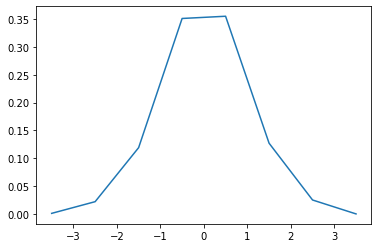

In [ ]:
from matplotlib import pyplot as plt
plt.plot(bins, histogram)

In [ ]:
# calculate mean
np.mean(samples)

0.01574058215376203

In [ ]:
# calculate median
np.median(samples)

0.017760892395545097

The median is also the percentile 50, because 50% of the observation are below it:


In [ ]:
# calculate percentiles
stats.scoreatpercentile(samples,50)

0.017760892395545097

In [ ]:
# similarly, we can calculate 90 percentile
stats.scoreatpercentile(samples,50)

0.017760892395545097

In [ ]:
stats.scoreatpercentile(samples,90)

1.3003779670735938

## Linear algebra operations: `scipy.linalg`

The scipy.linalg module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).

In [ ]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])

The `scipy.linalg.det()` function computes the determinant of a square matrix:

In [ ]:
linalg.det(arr)

-2.0

In [ ]:
# similar function in numpy
np.linalg.det(arr)

-2.0000000000000004

In [ ]:
# Another example
arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr)

0.0

The `scipy.linalg.inv()` function computes the inverse of a square matrix:

In [ ]:
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

This raises the question: What is the difference between NumPy and Scipy?

In an ideal world, NumPy would contain nothing but the array data type and the most basic operations: indexing, sorting, reshaping, basic elementwise functions, etc. All numerical code would reside in SciPy. However, one of NumPy’s important goals is compatibility, so NumPy tries to retain all features supported by either of its predecessors. Thus, **NumPy contains some linear algebra functions and Fourier transforms, even though these more properly belong in SciPy**. In any case, SciPy contains more fully-featured versions of the linear algebra modules, as well as many other numerical algorithms. If you are doing scientific computing with Python, you should probably install both NumPy and SciPy. Most new features belong in SciPy rather than NumPy.

Source: https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy



## Interpolation: `scipy.interpolate`

scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists.

In [ ]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

`scipy.interpolate.interp1d` can build a linear interpolation function:

In [ ]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

Then the result can be evaluated at the time of interest:

In [ ]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

A cubic interpolation can also be selected by providing the kind optional keyword argument:

In [ ]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

Plot the data and the interpolation

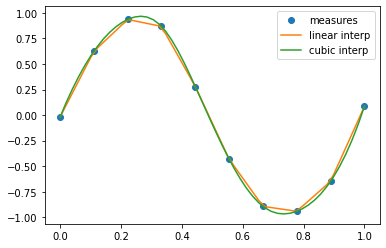

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()